In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
#import ecdf
import seaborn as sns

In [3]:
import numpy as np

In [4]:
def ecdf(data):
    """Compute x, y values for an empirical distribution function."""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

In [5]:
def pboc_style_mpl():
    """
    Formats matplotlib plotting enviroment to that used in
    Physical Biology of the Cell, 2nd edition.
    """
    rc = {'lines.linewidth': 1.25,
          'axes.labelsize': 8,
          'axes.titlesize': 9,
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
          'legend.fontsize': 8,
          'figure.dpi': 300,
          'savefig.dpi': 300}
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=-1)
    plt.rc('ytick.major', pad=-1)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[3.5, 2.5])
    plt.rc('svg', fonttype='none')
    sns.set_style('darkgrid', rc=rc)
    sns.set_palette("colorblind", color_codes=True)
    sns.set_context('notebook', rc=rc)
pboc_style_mpl()

In [14]:
df = pd.io.parsers.read_csv('/home/bill/TF_binding_locations_v2',sep=',')

In [16]:
df = df[['gene','start','end','RNAP','type']]

In [17]:
df

,gene,start,end,RNAP,type
0,bdcR,88,109,105,rep
1,ftsK,107,119,100,rep
2,ykgE,12,33,74,act
3,ykgE,80,92,74,rep
4,groSL,120,130,133,act
...,...,...,...,...,...
73,mutM,92,106,104,rep
74,ydjA,103,111,102,rep
75,dcm,79,90,149,rep
76,ybjL,28,37,104,rep


In [18]:
df_act = df.loc[df['type'] == 'act']

In [19]:
df_rep = df.loc[df['type'] == 'rep']

In [20]:
def convert_int(s):
    return int(s)

In [21]:
middle_act = (df_act['end'].apply(convert_int) - df_act['start'].apply(convert_int))/2 + df_act['start'].apply(convert_int)

RNAP value is the location of the -11 element of the RNAP binding site.

In [22]:
output_act = middle_act - df_act['RNAP'] -11

<Figure size 252x180 with 0 Axes>

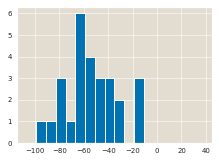

In [36]:
plt.clf()
fig,ax = plt.subplots()
plt.hist(output_act,bins=np.linspace(-115,45,21))
ax.set_xlim([-115,45])
plt.savefig('TF_binding_locations_act_june.eps',format='eps')
#plt.show()

In [30]:
middle_rep = (df_rep['end'].apply(convert_int) - df_rep['start'].apply(convert_int))/2 + df_rep['start'].apply(convert_int)

In [31]:
output_rep = middle_rep - df_rep['RNAP'] -11

<Figure size 252x180 with 0 Axes>

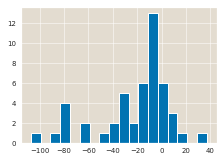

In [35]:
plt.clf()
fig,ax = plt.subplots()

plt.hist(output_rep,bins=np.linspace(-115,45,21))
ax.set_xlim([-115,45])
plt.savefig('TF_binding_locations_rep_june2020.eps',format='eps')
#plt.show()